# Initial Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("./kieranFeatures_1-30_26-Sep-2024.csv")
df.head()

,ID,EDA_TonicMean_version02,EDA_TonicMean_version03,EDA_TonicMean_version04,EDA_TonicMean_version05,EDA_TonicMean_version09,EDA_TonicMean_version10,EDA_TonicMean_version11,EDA_TonicMean_version12,EDA_TonicMean_version16,...,EEG_avgRelTheta_version16,EEG_avgRelTheta_version17,EEG_avgRelTheta_version19,EEG_avgRelTheta_version20,EEG_avgRelTheta_version22,EEG_avgRelTheta_version23,adjSA1,adjSA2,adjSA3,adjSAtotal
0,5,-0.123031,-0.226077,-1.220480,-1.697738,-0.273200,-0.601171,-0.809518,-1.012558,-0.299118,...,-1.877017,-1.442056,1.070298,1.277417,0.249605,0.400156,0.119790,1.593122,-0.800726,0.350233
1,5,-0.152896,-0.050866,1.527067,1.883468,-0.378060,-0.018812,1.023216,1.189124,-0.355315,...,-1.632698,-1.531970,1.779032,1.074498,0.409991,0.333842,0.075246,-1.663383,0.859309,-0.262893
2,5,-0.166035,-0.181478,1.634437,0.904620,-0.424192,-0.452936,1.123414,0.534554,-0.380039,...,-1.489450,-1.448590,2.194570,1.262672,0.504028,0.395338,-1.072729,0.879836,-1.542415,-0.938513
3,5,-0.231095,-0.209571,1.654951,1.247081,-0.652624,-0.546311,1.214370,0.821624,-0.502463,...,-1.353433,-1.059878,2.589134,2.139926,0.593317,0.682023,-0.643181,-0.217332,0.945816,0.145041
4,5,-0.236090,-0.323013,-0.478244,-1.080788,-0.670161,-0.923364,-0.421866,-0.775114,-0.511862,...,-1.443846,-0.627980,2.326862,3.114644,0.533965,1.000560,-0.323098,0.712401,-1.473404,-0.642872


# Setting Up Outcome Variables

In [2]:
# Create binary variables for high and low 
adj_SA_1_median = np.median(df["adjSA1"])
adj_SA_2_median = np.median(df["adjSA2"])
adj_SA_3_median = np.median(df["adjSA3"])

# Will be high if adjusted SA level score is equal to or above median, low otherwise
# df["Lv_1_Lo"] = (df["adjSA1"] < adj_SA_1_median).astype(int)
df["Lv_1_Hi"] = (df["adjSA1"] >= adj_SA_1_median).astype(int)
# df["Lv_2_Lo"] = (df["adjSA2"] < adj_SA_2_median).astype(int)
df["Lv_2_Hi"] = (df["adjSA1"] >= adj_SA_2_median).astype(int)
# df["Lv_3_Lo"] = (df["adjSA3"] < adj_SA_2_median).astype(int)
df["Lv_3_Hi"] = (df["adjSA1"] >= adj_SA_2_median).astype(int)

Divide up dataframe into predictors and outcomes. Train-test-split the following data.

In [3]:
predictors_df = df.iloc[:, 1:(df.shape[1] - 7)]
outcomes_df = df.iloc[:, (df.shape[1] - 7):]

display(predictors_df)
display(outcomes_df)

# Free up memory
del df

predictors_train, predictors_test, outcomes_train, outcomes_test = train_test_split(predictors_df, outcomes_df, test_size = 0.2, random_state = 42)

display(predictors_train)
display(outcomes_train)

,EDA_TonicMean_version02,EDA_TonicMean_version03,EDA_TonicMean_version04,EDA_TonicMean_version05,EDA_TonicMean_version09,EDA_TonicMean_version10,EDA_TonicMean_version11,EDA_TonicMean_version12,EDA_TonicMean_version16,EDA_TonicMean_version17,...,EEG_avgRelTheta_version09,EEG_avgRelTheta_version10,EEG_avgRelTheta_version11,EEG_avgRelTheta_version12,EEG_avgRelTheta_version16,EEG_avgRelTheta_version17,EEG_avgRelTheta_version19,EEG_avgRelTheta_version20,EEG_avgRelTheta_version22,EEG_avgRelTheta_version23
0,-0.123031,-0.226077,-1.220480,-1.697738,-0.273200,-0.601171,-0.809518,-1.012558,-0.299118,-0.469374,...,-2.470055,-1.633813,-1.521523,-1.189742,-1.877017,-1.442056,1.070298,1.277417,0.249605,0.400156
1,-0.152896,-0.050866,1.527067,1.883468,-0.378060,-0.018812,1.023216,1.189124,-0.355315,-0.160570,...,-1.999027,-1.796969,-0.890211,-0.846923,-1.632698,-1.531970,1.779032,1.074498,0.409991,0.333842
2,-0.166035,-0.181478,1.634437,0.904620,-0.424192,-0.452936,1.123414,0.534554,-0.380039,-0.390771,...,-1.722859,-1.645669,-0.543299,-0.588502,-1.489450,-1.448590,2.194570,1.262672,0.504028,0.395338
3,-0.231095,-0.209571,1.654951,1.247081,-0.652624,-0.546311,1.214370,0.821624,-0.502463,-0.440284,...,-1.460630,-0.940319,-0.955926,-0.744128,-1.353433,-1.059878,2.589134,2.139926,0.593317,0.682023
4,-0.236090,-0.323013,-0.478244,-1.080788,-0.670161,-0.923364,-0.421866,-0.775114,-0.511862,-0.640221,...,-1.634937,-0.156605,-0.344389,0.214848,-1.443846,-0.627980,2.326862,3.114644,0.533965,1.000560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,-0.390463,-0.392143,-0.150550,-0.112208,-0.248912,-0.241573,-0.239724,-0.191818,-0.336535,-0.330997,...,-0.046622,-0.464843,0.523703,0.110708,0.163210,-0.308442,0.105745,-0.391989,0.798338,-0.432294
300,-0.369596,-0.380586,-0.609280,-0.487820,-0.175647,-0.203160,-0.582746,-0.450147,-0.286580,-0.305082,...,-0.102853,-0.200243,0.539456,0.390624,0.101655,-0.000704,0.021136,-0.062902,0.571962,0.092100
301,-0.457362,-0.382835,-1.247644,-0.132967,-0.483803,-0.210636,-1.131586,-0.204537,-0.496694,-0.310125,...,0.160880,-0.095837,2.240786,1.697116,0.390354,0.120724,0.417964,0.066950,1.633695,0.299016
302,-0.370669,-0.390531,-1.078873,-0.866528,-0.179415,-0.236215,-0.917973,-0.699119,-0.289149,-0.327382,...,-0.394919,-0.514674,-0.292277,-0.368327,-0.218058,-0.366396,-0.418322,-0.453964,-0.603831,-0.531050


,adjSA1,adjSA2,adjSA3,adjSAtotal,Lv_1_Hi,Lv_2_Hi,Lv_3_Hi
0,0.119790,1.593122,-0.800726,0.350233,1,1,1
1,0.075246,-1.663383,0.859309,-0.262893,0,0,0
2,-1.072729,0.879836,-1.542415,-0.938513,0,0,0
3,-0.643181,-0.217332,0.945816,0.145041,0,0,0
4,-0.323098,0.712401,-1.473404,-0.642872,0,0,0
...,...,...,...,...,...,...,...
299,0.076099,1.105227,-0.609431,0.209332,0,0,0
300,-0.258249,-0.360422,0.778641,0.155357,0,0,0
301,0.110240,0.092504,0.945232,0.627581,1,1,1
302,-1.105639,0.426616,0.328063,-0.108335,0,0,0


,EDA_TonicMean_version02,EDA_TonicMean_version03,EDA_TonicMean_version04,EDA_TonicMean_version05,EDA_TonicMean_version09,EDA_TonicMean_version10,EDA_TonicMean_version11,EDA_TonicMean_version12,EDA_TonicMean_version16,EDA_TonicMean_version17,...,EEG_avgRelTheta_version09,EEG_avgRelTheta_version10,EEG_avgRelTheta_version11,EEG_avgRelTheta_version12,EEG_avgRelTheta_version16,EEG_avgRelTheta_version17,EEG_avgRelTheta_version19,EEG_avgRelTheta_version20,EEG_avgRelTheta_version22,EEG_avgRelTheta_version23
269,-0.494618,-0.555541,-2.076390,-1.869410,0.597167,0.362062,-1.765695,-1.479098,0.418093,0.161042,...,0.462172,0.859784,-0.051114,0.233826,0.237753,0.649436,0.111443,0.465456,0.779651,0.627392
211,-0.495506,-0.500435,-0.131699,-0.129467,-0.662698,-0.644065,-0.258565,-0.237457,-0.612173,-0.596055,...,-0.260123,1.010109,-0.213657,0.601153,-0.307295,0.907735,-0.047399,1.014504,0.237016,1.841947
197,0.297909,0.310984,-1.254804,-0.683124,-0.014281,0.030278,-0.612785,-0.323310,-0.147675,-0.124319,...,-1.458536,-2.291505,-0.823308,-1.187300,-1.355405,-1.868532,-0.703187,-1.310684,-0.785986,-1.462410
75,-0.751382,-0.767114,0.220138,-0.002063,-1.119621,-1.112651,0.082926,-0.217642,-1.034901,-1.023674,...,-0.084950,-0.236394,-1.212890,-1.107865,-0.042654,-0.178245,-0.830580,-0.678148,-1.206773,-0.626839
177,-0.354384,-0.332566,-1.195093,-0.569050,-1.246429,-1.107403,-0.981167,-0.478398,-0.795857,-0.715333,...,0.509455,0.654922,0.548907,0.656188,0.507635,0.712548,-0.440298,0.200804,-0.601341,0.526651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,-0.297054,-0.307219,-0.661230,-0.513394,-1.014946,-0.994582,-0.575531,-0.431628,-0.679828,-0.661295,...,-0.726769,-1.195044,-0.629046,-0.860808,-0.798998,-1.181357,0.012439,-0.598611,0.566104,-0.681974
71,-0.559570,-0.562361,1.381119,0.854606,-0.446144,-0.432101,1.443925,0.759285,-0.517737,-0.506605,...,0.597457,0.281063,-0.908693,-0.867127,0.619710,0.355382,0.196207,-0.034579,0.716476,0.070465
106,-0.362930,-0.376268,-0.392341,-0.370327,-0.500164,-0.518055,-0.417380,-0.369009,-0.471410,-0.478937,...,1.048729,1.497494,-0.488310,-0.037478,1.458071,2.088352,-0.736493,0.362864,-1.311561,0.741032
270,-0.663595,-0.680655,-0.323792,-0.360686,0.003870,-0.053789,-0.548041,-0.547836,-0.197162,-0.265638,...,0.846641,1.038962,0.487292,0.634474,0.559359,0.808679,0.689936,0.688303,2.265877,0.874194


,adjSA1,adjSA2,adjSA3,adjSAtotal,Lv_1_Hi,Lv_2_Hi,Lv_3_Hi
269,0.143670,1.101324,-0.822506,0.117187,1,1,1
211,-0.783965,-0.834554,0.116317,-0.677632,0,0,0
197,0.475912,-0.162414,1.180378,0.804260,1,1,1
75,-0.088596,0.229732,0.972713,0.618738,0,0,0
177,-1.146056,0.662741,-3.060939,-1.932524,0,0,0
...,...,...,...,...,...,...,...
188,1.116062,0.313836,0.270247,0.799881,1,1,1
71,-0.881938,0.311514,-0.739256,-0.666210,0,0,0
106,-0.900207,0.372292,-1.423042,-1.032613,0,0,0
270,-2.025591,0.753425,0.139548,-0.472791,0,0,0


In [4]:
# Initialize list of outcome variables to avoid when analyzing
outcome_vars = ["Lv_1_Hi", "Lv_2_Hi", "Lv_3_Hi", "adjSA1", "adjSA2", "adjSA3", "adjSAtotal"]

# Discovering Correlations

## Correlations with Level 1 High SA
Use Point Biserial Correlation

In [5]:
SA1_coors = np.array([])
x = outcomes_df["Lv_1_Hi"]
for column in predictors_df:
    y = predictors_df[column]
    SA1_coors = np.append(SA1_coors, stats.pointbiserialr(x, y)[0])

SA1_coors

/home/jshen/.local/lib/python3.10/site-packages/scipy/stats/_stats_py.py:5657: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rpb, prob = pearsonr(x, y)


array([ 0.03088045,  0.03173773, -0.10178054, ..., -0.04544267,
        0.03009906, -0.01082491])

In [6]:
SA1_corrs_series = pd.Series(data = SA1_coors, index = predictors_df.columns)
SA1_corrs_series = SA1_corrs_series.sort_values(ascending = False, key = lambda x: np.abs(x))
SA1_corrs_series.head(50)

fNIRS_S3D4_hbr_mean_version09        0.259524
fNIRS_S6D4_hbr_mean_version09        0.248932
EYE_meanline_version02              -0.230052
fNIRS_S7D5_hbr_mean_version09        0.225756
fNIRS_S1D1_hbr_mean_version10        0.225447
fNIRS_S7D5_hbr_slope_version02       0.224202
fNIRS_S4D5_hbr_RMS_version03        -0.217083
fNIRS_S4D5_hbr_var_version03        -0.214469
fNIRS_S4D5_hbr_MaxAmp_version03     -0.213761
EYE_det_version03                   -0.212822
fNIRS_S4D5_hbr_MaxAmp_version02     -0.209365
fNIRS_S4D5_hbr_var_version02        -0.208932
fNIRS_S1D1_hbr_mean_version02        0.208749
fNIRS_S4D5_hbr_RMS_version02        -0.208439
fNIRS_S4D5_hbo_MaxAmp_version03     -0.207962
fNIRS_S2D1_hbr_mean_version10        0.207330
fNIRS_S4D5_hbo_RMS_version02        -0.206484
fNIRS_S6D4_hbr_skew_version03       -0.206203
EYE_det_version02                   -0.206132
fNIRS_S4D5_hbo_RMS_version03        -0.205783
fNIRS_S1D1_hbr_mean_version09        0.204328
fNIRS_S4D5_hbo_MaxAmp_version02   

In [8]:
# Initialize the model
SA1_model = LogisticRegression(penalty = "l1", C = 1.0, solver = "saga", max_iter = 5000)

# Scale the data
scaler = StandardScaler()
predictors_train_scaled = scaler.fit_transform(predictors_train)

params = {
    "C": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
    "penalty": [None, "l1", "l2", "elasticnet"],
    "l1_ratio": [.25, .50, .75]
}

# Perform 5-fold cross-validation with different regularization strengths and regularization types
clf = GridSearchCV(SA1_model, params, cv = 5, scoring = "f1", n_jobs = -1)
clf.fit(predictors_train_scaled, outcomes_train["Lv_1_Hi"])

# Show the best regularization strength and penaalty type
print("Best regularization strength:", clf.best_params_["C"])
print("Best penalty:", clf.best_params_["penalty"])

if clf.best_params_["penalty"] == "elasticnet":
    print("Best alpha:", clf.best_params_["l1_ratio"])

/home/jshen/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
/home/jshen/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/jshen/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
/home/jshen/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/jshen/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
/home/jshen/.local/lib/python3.10/site-pa

# Garbage code idk (correlations didn't look good, need to recalculate)

In [ ]:
# Get dataframe for ECG_pNN50 columns (correlation with SA 1)
pNN50_cols = [col for col in df.columns if "ECG_pNN50" in col]
SA1_data = df.loc[:, pNN50_cols + ["adjSA1", "Lv_1_Hi"]]
SA1_data

In [ ]:
# Get datframe for EDA_Phasic columns (correlation with SA 2 (phasic electrodermal level))
phasic_cols = [col for col in df.columns if "EDA_Phasic" in col]
SA2_data = df.loc[:, phasic_cols + ["adjSA2", "Lv_2_Hi"]]
SA2_data

In [ ]:
# Get datframe for EDA_Phasic columns (correlation with SA 3 (pretrial phasic responses?))
phasic_cols = [col for col in df.columns if "EDA_Phasic" in col]
SA3_data = df.loc[:, phasic_cols + ["adjSA3", "Lv_3_Hi"]]
SA3_data

In [6]:
# Clear memory
del df

<Axes: >

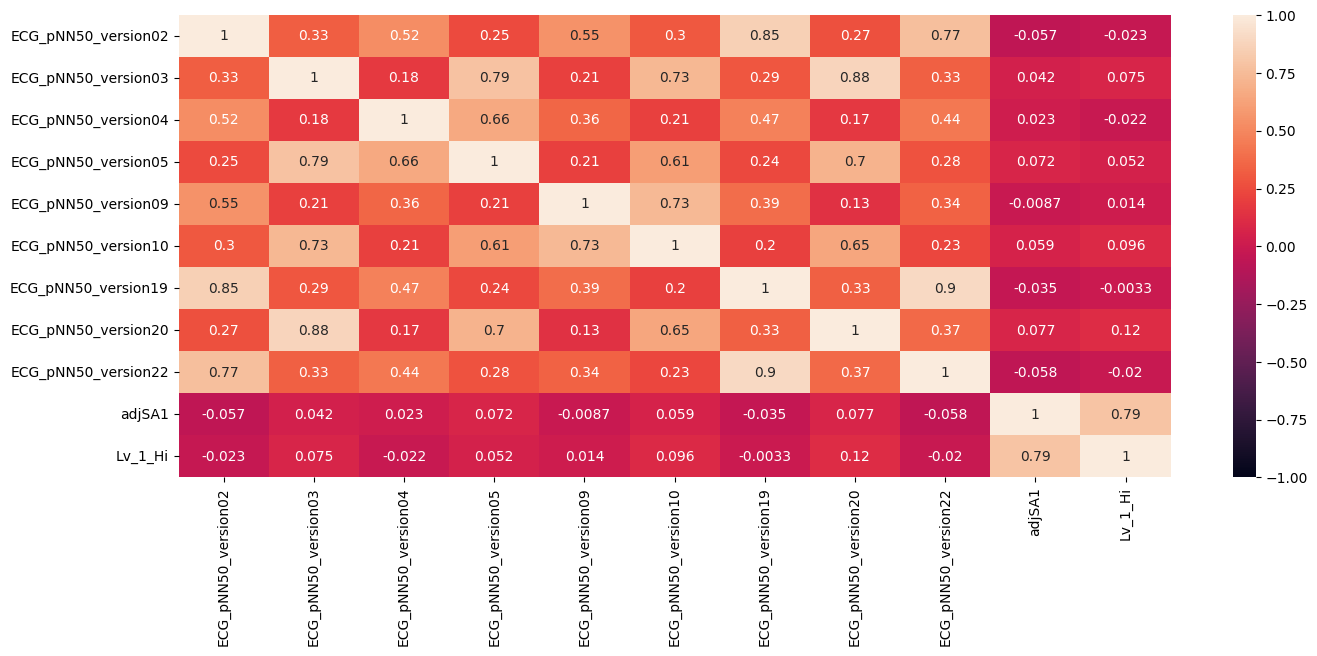

In [10]:
# sns.pairplot(SA1_data) <- Want to check correlations
plt.figure(figsize = (16, 6))
sns.heatmap(SA1_data.corr(), vmin = -1, vmax = 1, annot = True)

# Not much correlation with level 1 SA?